In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

In [3]:
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 15
optimizer = Adam()
verbosity = 1
num_folds = 20

In [4]:
(input_train, target_train), (input_test, target_test) = cifar10.load_data()
input_shape = (img_width, img_height, img_num_channels)

input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

input_train = input_train / 255
input_test = input_test / 255

acc_per_fold = []
loss_per_fold = []

inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
1140/1140 [==============================] - 77s 67ms/step - loss: 1.5267 - accuracy: 0.4525
Epoch 2/15
1140/1140 [==============================] - 76s 66ms/step - loss: 1.1102 - accuracy: 0.6075
Epoch 3/15
1140/1140 [==============================] - 75s 66ms/step - loss: 0.9464 - accuracy: 0.6687
Epoch 4/15
1140/1140 [==============================] - 75s 66ms/step - loss: 0.8382 - accuracy: 0.7069
Epoch 5/15
1140/1140 [==============================] - 75s 65ms/step - loss: 0.7507 - accuracy: 0.7369
Epoch 6/15
1140/1140 [==============================] - 74s 65ms/step - loss: 0.6751 - accuracy: 0.7629
Epoch 7/15
1140/1140 [==============================] - 74s 65ms/step - loss: 0.6004 - accuracy: 0.7888
Epoch 8/15
1140/1140 [==============================] - 74s 65ms/step - loss: 0.5317 - accuracy: 0.8131
Epoch 9/15
1140/1140 [==============================] - 74s 65ms/step -

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.3597116470336914 - Accuracy: 69.90000009536743%


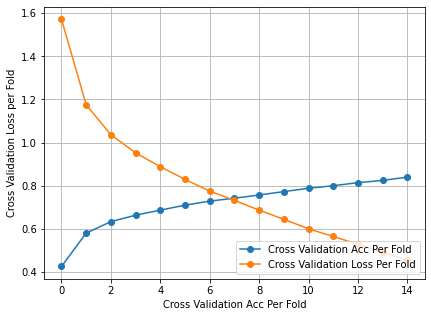

------------------------------------------------------------------------
> Fold 2 - Loss: 1.2323259115219116 - Accuracy: 68.09999942779541%


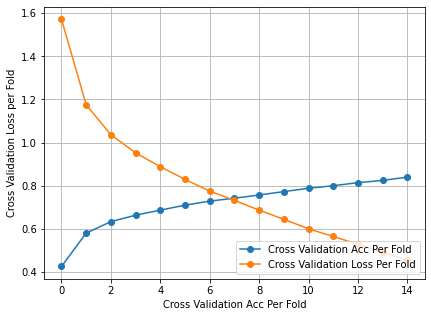

------------------------------------------------------------------------
> Fold 3 - Loss: 1.0772905349731445 - Accuracy: 69.16666626930237%


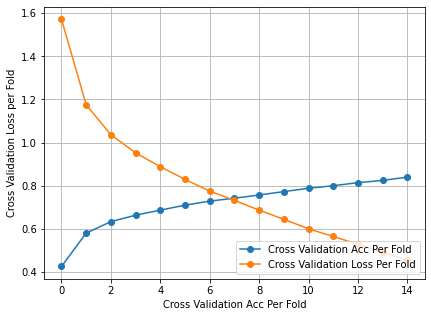

------------------------------------------------------------------------
> Fold 4 - Loss: 1.1376457214355469 - Accuracy: 68.33333373069763%


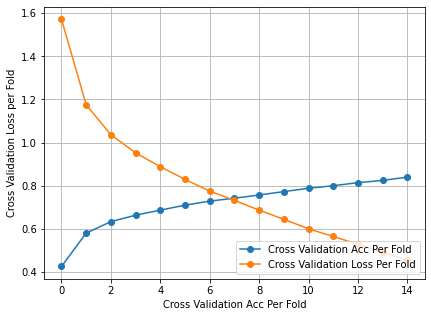

------------------------------------------------------------------------
> Fold 5 - Loss: 1.0876779556274414 - Accuracy: 68.80000233650208%


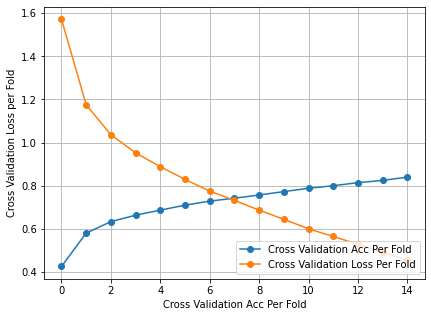

------------------------------------------------------------------------
> Fold 6 - Loss: 1.2576682567596436 - Accuracy: 68.36666464805603%


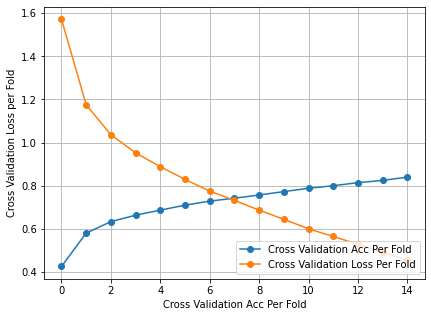

------------------------------------------------------------------------
> Fold 7 - Loss: 1.1385694742202759 - Accuracy: 66.8666660785675%


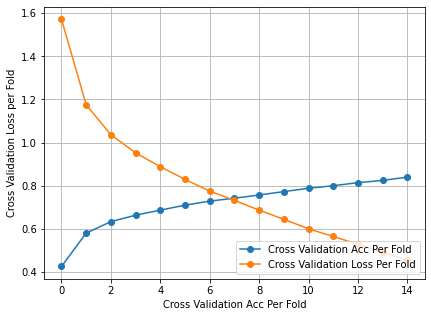

------------------------------------------------------------------------
> Fold 8 - Loss: 1.113623023033142 - Accuracy: 69.03333067893982%


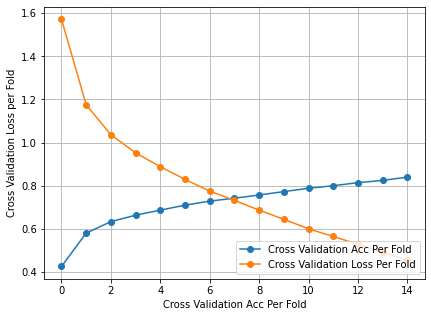

------------------------------------------------------------------------
> Fold 9 - Loss: 1.532278299331665 - Accuracy: 66.8666660785675%


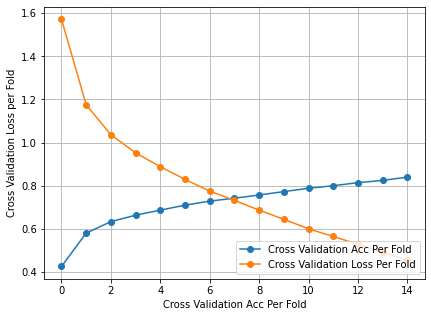

------------------------------------------------------------------------
> Fold 10 - Loss: 1.1143803596496582 - Accuracy: 68.33333373069763%


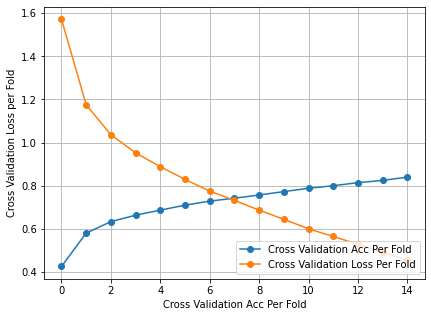

------------------------------------------------------------------------
> Fold 11 - Loss: 1.1888580322265625 - Accuracy: 68.16666722297668%


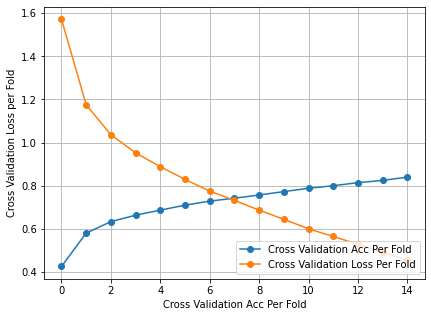

------------------------------------------------------------------------
> Fold 12 - Loss: 1.212466835975647 - Accuracy: 69.73333358764648%


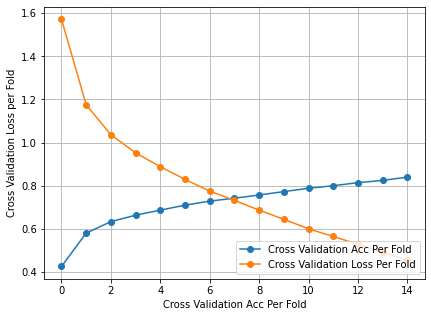

------------------------------------------------------------------------
> Fold 13 - Loss: 1.2562384605407715 - Accuracy: 68.59999895095825%


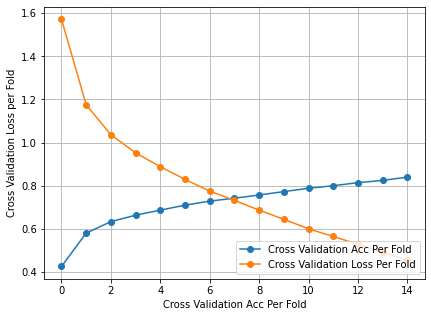

------------------------------------------------------------------------
> Fold 14 - Loss: 1.2185620069503784 - Accuracy: 70.53333520889282%


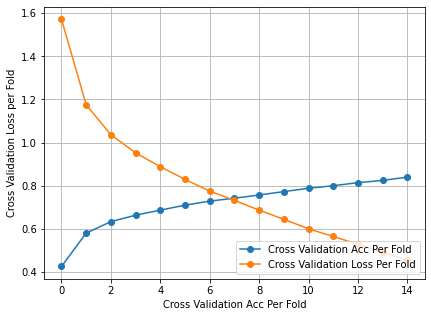

------------------------------------------------------------------------
> Fold 15 - Loss: 1.2054082155227661 - Accuracy: 67.33333468437195%


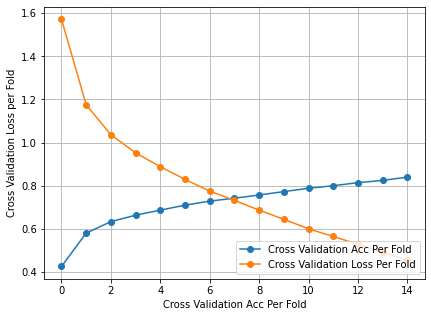

------------------------------------------------------------------------
> Fold 16 - Loss: 1.2652649879455566 - Accuracy: 69.56666707992554%


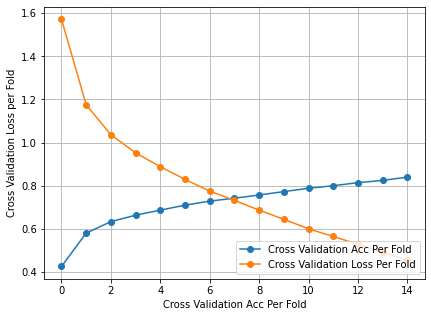

------------------------------------------------------------------------
> Fold 17 - Loss: 1.1010080575942993 - Accuracy: 70.23333311080933%


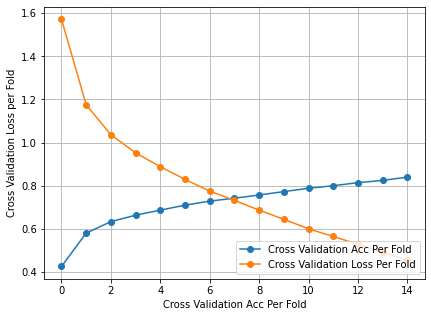

------------------------------------------------------------------------
> Fold 18 - Loss: 1.0997453927993774 - Accuracy: 67.5333321094513%


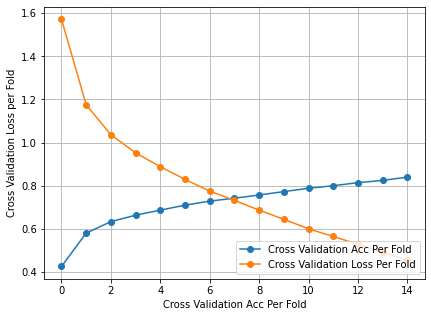

------------------------------------------------------------------------
> Fold 19 - Loss: 1.188727617263794 - Accuracy: 68.80000233650208%


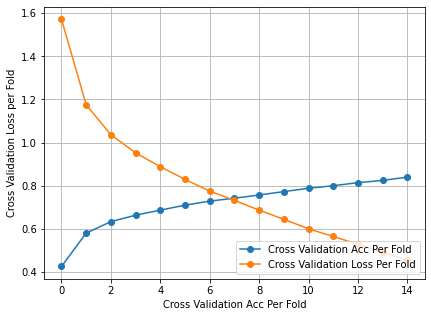

------------------------------------------------------------------------
> Fold 20 - Loss: 1.2076570987701416 - Accuracy: 66.8666660785675%


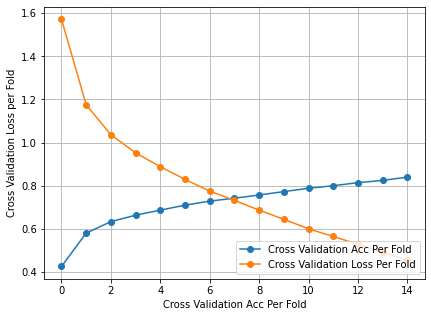

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 68.55666667222977 (+- 1.078327199119821)
> Loss: 1.1997553944587707


In [6]:
import matplotlib.pyplot as plt

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], 'o-', label='Cross Validation Acc Per Fold')
  plt.plot(history.history['loss'], 'o-', label = 'Cross Validation Loss Per Fold')
  plt.xlabel('Cross Validation Acc Per Fold')
  plt.ylabel('Cross Validation Loss per Fold')
  plt.grid(True)
  plt.legend(loc='lower right')
  plt.show()
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')